In [1]:
# import required libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import matplotlib.pyplot as plt
from sklearn import tree
import seaborn as sns

In [2]:
# import data
data = pd.read_csv('parkinsons.data')

In [3]:
# split data to X and y
X = data.drop(['name','status'],axis=1)
# Check unique values in the 'status' column
y = data['status']

In [4]:
# split the dataset into training, validation, and testing sets
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=7,stratify=y)


In [5]:
# scale the numerical features

scaler = StandardScaler()
X_train_val = scaler.fit_transform(X_train_val)
X_test = scaler.transform(X_test)

In [6]:
# Define hyperparameter grid for tuning

param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 3, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=7)

# Create GridSearchCV instance
grid_search = GridSearchCV(dt_classifier, param_grid, cv=5, scoring='accuracy',refit=True)

# Fit the grid search to the data
grid_search.fit(X_train_val, y_train_val)

# Get the best parameters and best estimator
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

In [7]:
print('Best parameters: ', best_params)
print('Best model: ', best_model)

Best parameters:  {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10}
Best model:  DecisionTreeClassifier(criterion='entropy', min_samples_leaf=4,
                       min_samples_split=10, random_state=7)


In [8]:
# Predict on the test set
y_test_pred = best_model.predict(X_test)

# Evaluate the model on the test set
test_accuracy = accuracy_score(y_test, y_test_pred)
test_conf_matrix = confusion_matrix(y_test, y_test_pred)
test_class_report = classification_report(y_test, y_test_pred)

print(f"Test Accuracy: {test_accuracy:.2f}")
print("Test Confusion Matrix:\n", test_conf_matrix)
print("Test Classification Report:\n", test_class_report)

Test Accuracy: 0.95
Test Confusion Matrix:
 [[ 9  1]
 [ 1 28]]
Test Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.90      0.90        10
           1       0.97      0.97      0.97        29

    accuracy                           0.95        39
   macro avg       0.93      0.93      0.93        39
weighted avg       0.95      0.95      0.95        39



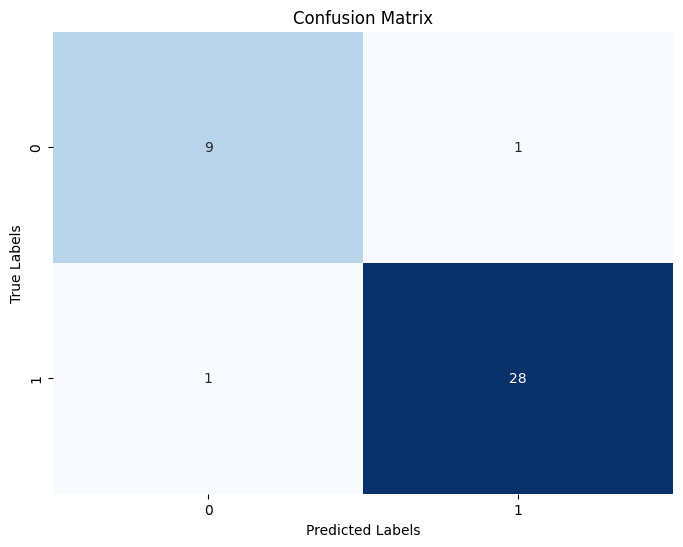

In [9]:
# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(test_conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

[Text(0.5, 0.9, 'PPE <= -0.841\nentropy = 0.801\nsamples = 156\nvalue = [38, 118]\nclass = 1'),
 Text(0.23076923076923078, 0.7, 'MDVP:Fhi(Hz) <= 0.352\nentropy = 0.863\nsamples = 35\nvalue = [25, 10]\nclass = 0'),
 Text(0.15384615384615385, 0.5, 'RPDE <= -1.584\nentropy = 0.998\nsamples = 19\nvalue = [9, 10]\nclass = 1'),
 Text(0.07692307692307693, 0.3, 'entropy = 0.0\nsamples = 6\nvalue = [0, 6]\nclass = 1'),
 Text(0.23076923076923078, 0.3, 'NHR <= -0.476\nentropy = 0.89\nsamples = 13\nvalue = [9, 4]\nclass = 0'),
 Text(0.15384615384615385, 0.1, 'entropy = 0.0\nsamples = 7\nvalue = [7, 0]\nclass = 0'),
 Text(0.3076923076923077, 0.1, 'entropy = 0.918\nsamples = 6\nvalue = [2, 4]\nclass = 1'),
 Text(0.3076923076923077, 0.5, 'entropy = 0.0\nsamples = 16\nvalue = [16, 0]\nclass = 0'),
 Text(0.7692307692307693, 0.7, 'MDVP:APQ <= -0.241\nentropy = 0.492\nsamples = 121\nvalue = [13, 108]\nclass = 1'),
 Text(0.6923076923076923, 0.5, 'MDVP:Fo(Hz) <= -0.855\nentropy = 0.804\nsamples = 53\nvalue

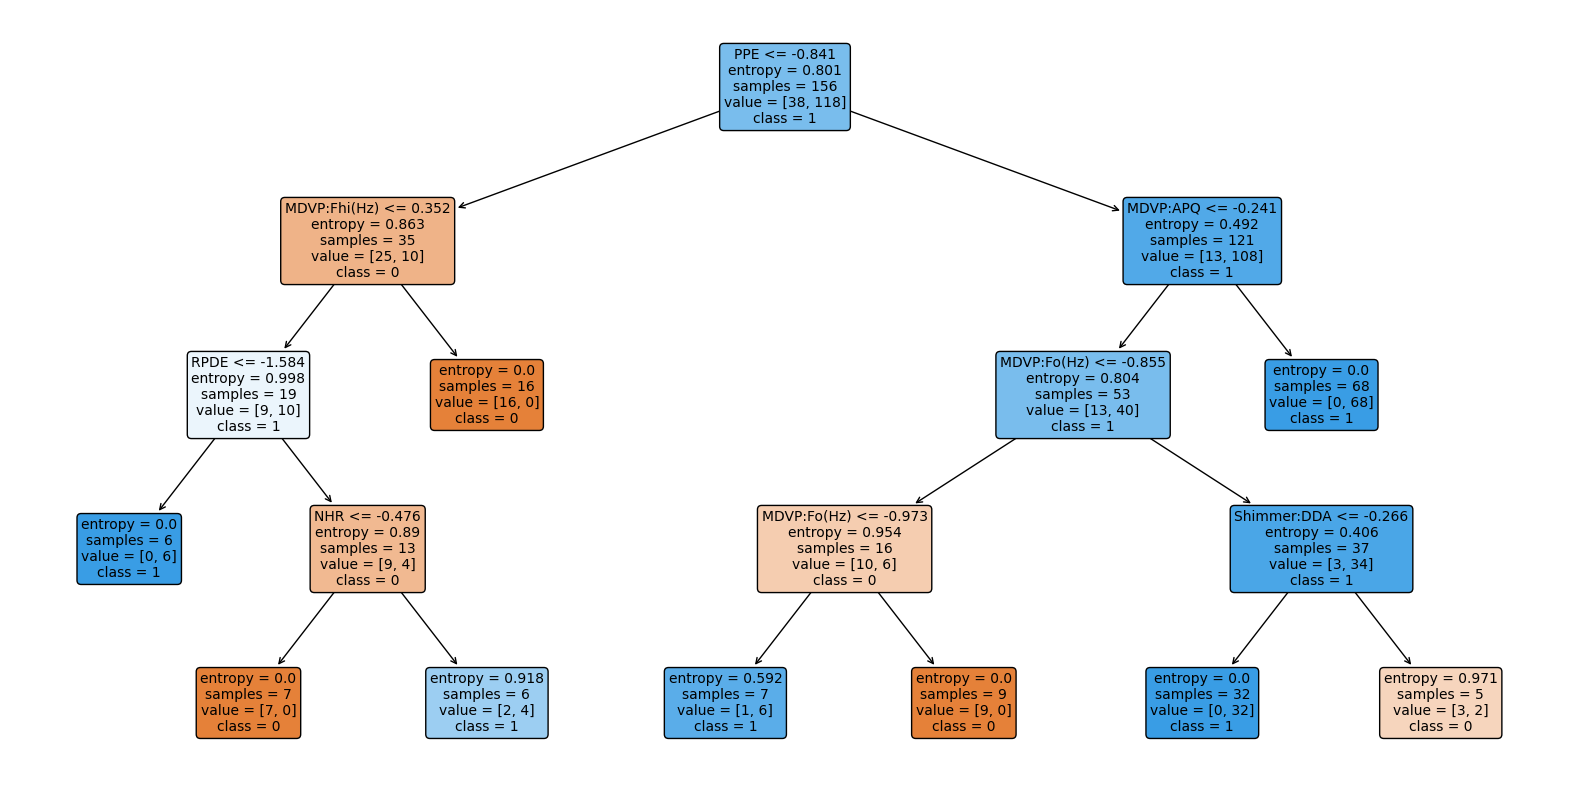

In [10]:
# U svakom čvora stabla naveden je test, zatim vrednost korišćene mere homogenosti, 
# ukupan broj instaci koji je analiziran, kao i broj instanci po klasama. 

plt.figure(figsize=(20, 10))
tree.plot_tree(best_model, fontsize=10, feature_names=list(X.keys()), filled=True, rounded=True, class_names=['0','1'])

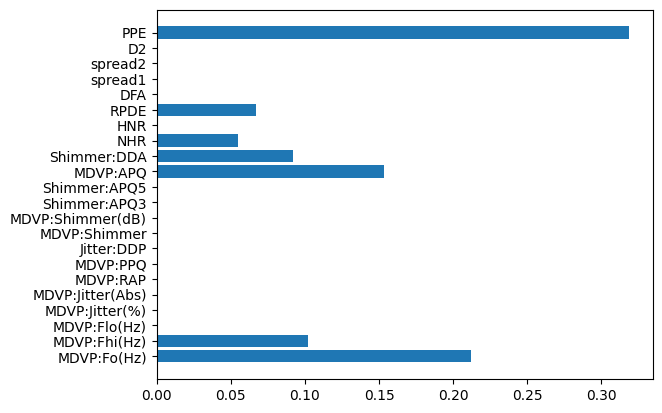

In [11]:
# Importance of features

plt.barh(list(X.keys()), best_model.feature_importances_)
plt.show()

In [12]:
# Save model
import pickle

with open('../models/decision_tree.model.pickle', 'wb') as model_file:
    pickle.dump(best_model, model_file)
    
with open('../models/decision_tree.scaler.pickle', 'wb') as model_file:
    pickle.dump(scaler, model_file)